<a href="https://colab.research.google.com/github/AjayJohnAlex/Linear-Regression/blob/master/Regression_rmse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
print("hello")

hello


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df2 = pd.read_csv('/content/Expander_data.csv')
df2.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
0,1/4/2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,NaN
1,1/4/2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,NaN
2,1/4/2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,NaN
3,1/4/2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,NaN
4,1/4/2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,NaN


In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296450 entries, 0 to 296449
Data columns (total 9 columns):
Timestamp                     296450 non-null object
Suction Pressure (psig)       296450 non-null float64
Suction Temperature (F)       296450 non-null float64
Total Flow (gpm)              296450 non-null float64
Speed (rpm)                   296450 non-null float64
By-pass Valve Position (%)    296450 non-null float64
Discharge Pressure (psig)     296450 non-null float64
Discharge Temperature (F)     296450 non-null float64
Run Status                    0 non-null float64
dtypes: float64(8), object(1)
memory usage: 20.4+ MB


In [0]:
df2 = df2.drop('Run Status',axis=1)
df2.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F)
0,1/4/2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448
1,1/4/2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636
2,1/4/2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324
3,1/4/2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113
4,1/4/2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795


In [0]:
df2.nunique()

Timestamp                      74113
Suction Pressure (psig)       296390
Suction Temperature (F)       295872
Total Flow (gpm)              296410
Speed (rpm)                   296054
By-pass Valve Position (%)     46504
Discharge Pressure (psig)     296431
Discharge Temperature (F)     295893
dtype: int64

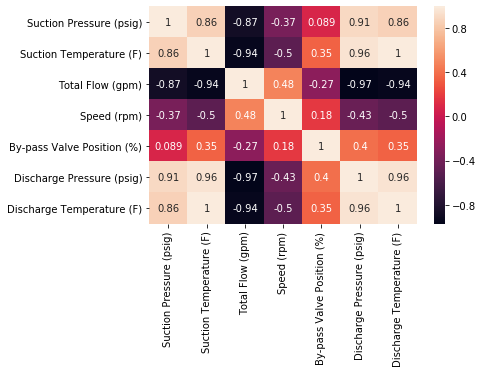

In [0]:
sns.heatmap(df2.corr(),annot=True)

In [0]:
df2.describe()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F)
count,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000
mean,590.541350,-231.564934,8119.917777,2955.416695,2.005667,186.991087,-229.764934
std,23.216552,3.574107,398.049531,54.201467,2.488568,56.205183,3.574136
min,552.420048,-238.594971,7056.004500,2835.750571,-0.200000,69.983885,-236.816223
25%,572.757269,-234.171427,7916.322054,2906.336126,0.000000,143.468467,-232.371760
50%,586.491792,-230.922352,8144.161813,2961.788792,0.000000,183.270451,-229.122946
75%,605.986608,-229.585168,8388.610374,3000.863611,4.000000,223.580205,-227.785796
max,649.217417,-223.440125,8975.986378,3090.367995,8.026667,324.411576,-221.617102


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
df2.isna().sum()

Timestamp                     0
Suction Pressure (psig)       0
Suction Temperature (F)       0
Total Flow (gpm)              0
Speed (rpm)                   0
By-pass Valve Position (%)    0
Discharge Pressure (psig)     0
Discharge Temperature (F)     0
dtype: int64

In [0]:
df2.dropna(inplace=True)

In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296450 entries, 0 to 296449
Data columns (total 8 columns):
Timestamp                     296450 non-null object
Suction Pressure (psig)       296450 non-null float64
Suction Temperature (F)       296450 non-null float64
Total Flow (gpm)              296450 non-null float64
Speed (rpm)                   296450 non-null float64
By-pass Valve Position (%)    296450 non-null float64
Discharge Pressure (psig)     296450 non-null float64
Discharge Temperature (F)     296450 non-null float64
dtypes: float64(7), object(1)
memory usage: 20.4+ MB


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df2.drop(['Discharge Pressure (psig)','Timestamp'],axis=1)
y = df2[['Discharge Pressure (psig)']]

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=101)

In [0]:
import statsmodels.api as sm

In [0]:
X.head()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Temperature (F)
0,596.100853,-229.436683,7925.800487,2999.411045,6.0,-227.614448
1,596.838217,-230.453708,8085.917724,2989.706617,6.0,-228.668636
2,596.468895,-229.545356,7902.175243,3006.331679,6.0,-227.755324
3,603.568271,-230.309438,7991.808959,3010.487486,6.0,-228.489113
4,595.407372,-229.767969,7871.560747,2986.665518,6.0,-227.971795


In [0]:
logistic_model1 = sm.OLS(y,X).fit()

In [0]:
logistic_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Discharge Pressure (psig)   R-squared (uncentered):                   1.000
Model:                                   OLS   Adj. R-squared (uncentered):              1.000
Method:                        Least Squares   F-statistic:                          1.595e+08
Date:                       Wed, 29 Jan 2020   Prob (F-statistic):                        0.00
Time:                               15:10:55   Log-Likelihood:                     -7.8658e+05
No. Observations:                     296450   AIC:                                  1.573e+06
Df Residuals:                         296444   BIC:                                  1.573e+06
Df Model:                                  6                                                  
Covariance Type:                   nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Suction Pressure (psig)        1.0826      0.001   2041.842      0.000       1.082       1.084
Suction Temperature (F)      -94.7283      0.403   -235.068      0.000     -95.518     -93.939
Total Flow (gpm)              -0.0744   4.87e-05  -1529.430      0.000      -0.075      -0.074
Speed (rpm)                   -0.0791      0.000   -493.908      0.000      -0.079      -0.079
By-pass Valve Position (%)     5.6253      0.003   1751.466      0.000       5.619       5.632
Discharge Temperature (F)     93.8398      0.406    231.178      0.000      93.044      94.635
==============================================================================
Omnibus:                     6971.612   Durbin-Watson:                   0.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10311.443
Skew:                          -0.256   Prob(JB):                         0.00
Kurtosis:                       3.756   Cond. No.                     7.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr = LinearRegression()

In [0]:
model = lr.fit(X_train,y_train)

In [0]:
predictions = model.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
np.sqrt(mean_squared_error(y_test,predictions))

2.4603373409150495

In [0]:
plt.rcParams['agg.path.chunksize'] = 10000

In [0]:
print(y_test[:5])
print(predictions[:5])

        Discharge Pressure (psig)
278684                 230.165511
166020                 206.571681
207547                 142.088463
121869                 227.972975
176158                 127.503853
[[229.59742537]
 [205.53416778]
 [143.6552871 ]
 [226.86231946]
 [129.1553037 ]]


No handles with labels found to put in legend.


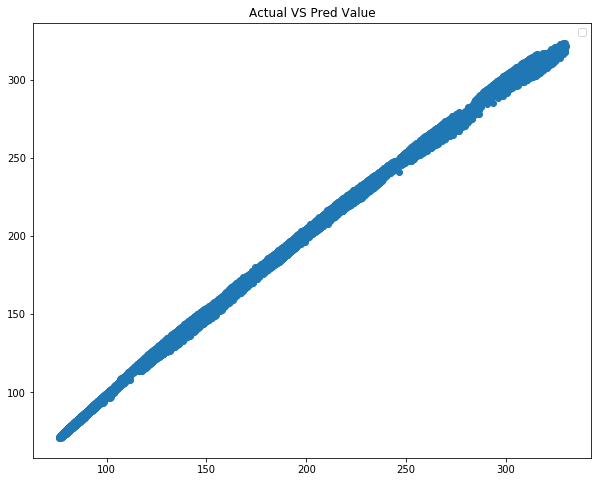

In [0]:
plt.figure(figsize=(10,8))
plt.scatter(predictions,y_test)
plt.title("Actual VS Pred Value")
plt.legend(loc="best")

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif1["features"] = X.columns
vif1

,VIF Factor,features
0,2.465169e+03,Suction Pressure (psig)
1,2.186707e+08,Suction Temperature (F)
2,3.930135e+03,Total Flow (gpm)
3,5.631739e+03,Speed (rpm)
4,2.645556e+00,By-pass Valve Position (%)
5,2.184346e+08,Discharge Temperature (F)


Minimum value for VIF is 1 and any value more than 10 is a result of colinearity. Still we will take out Speed(rpm) as it has highest value 

In [0]:
X1 = X.drop('Speed (rpm)',axis=1)

logistic_model2 = sm.OLS(y,X1).fit()

In [0]:
logistic_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Discharge Pressure (psig)   R-squared (uncentered):                   0.999
Model:                                   OLS   Adj. R-squared (uncentered):              0.999
Method:                        Least Squares   F-statistic:                          1.050e+08
Date:                       Wed, 29 Jan 2020   Prob (F-statistic):                        0.00
Time:                               15:11:32   Log-Likelihood:                     -8.7558e+05
No. Observations:                     296450   AIC:                                  1.751e+06
Df Residuals:                         296445   BIC:                                  1.751e+06
Df Model:                                  5                                                  
Covariance Type:                   nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Suction Pressure (psig)        0.9855      0.001   1482.342      0.000       0.984       0.987
Suction Temperature (F)     -123.4144      0.538   -229.221      0.000    -124.470    -122.359
Total Flow (gpm)              -0.0789   6.46e-05  -1222.145      0.000      -0.079      -0.079
By-pass Valve Position (%)     4.7933      0.004   1298.272      0.000       4.786       4.801
Discharge Temperature (F)    123.3537      0.542    227.556      0.000     122.291     124.416
==============================================================================
Omnibus:                     4004.307   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4004.914
Skew:                           0.267   Prob(JB):                         0.00
Kurtosis:                       2.800   Cond. No.                     7.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.33,random_state=101)
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
np.sqrt(mean_squared_error(y_test,predictions))

3.485003251457413

In [0]:
# As the error rate increased so the finally all the variables would be taken. SO final model is "model"